### Manual Neuron Network

In [13]:
import numpy as np

Operation class

- Input nodes
- Output nodes
- Global Default Graph Variable
- Compute method

### Operation

In [14]:
class Operation():
    
    def __init__(self,input_nodes=[]):
        self.input_nodes = input_nodes
        self.output_nodes = []
        
        for node in input_nodes:
            node.output_nodes.append(self)
            
        _default_graph.operations.append(self)
            
    def compute(self):
        pass 

In [15]:
class add(Operation):
    
    def __init__(self,x,y):
        super().__init__([x,y])
        
    def compute(self,x,y):
        self.inputs = [x,y]
        return x + y

In [16]:
class multiply(Operation):
    
    def __init__(self,x,y):
        super().__init__([x,y])
        
    def compute(self,v_x,v_y):
        self.inputs = [v_x,v_y]
        return v_x * v_y

In [71]:
class matmul(Operation):
    
    def __init__(self,x,y):
        super().__init__([x,y])
        
    def compute(self,v_x,v_y):
        self.inputs = [v_x,v_y]
        return v_x.dot(v_y)

In [18]:
class Placeholder():
    
    def __init__(self):
        self.output_nodes = []
        
        _default_graph.placeholders.append(self)

In [19]:
class Variable():
    
    def __init__(self,initial_value=None):
        self.value = initial_value
        self.output_nodes = []
        
        _default_graph.variables.append(self)

In [20]:
class Graph():
    
    def __init__(self):
        self.operations = []
        self.placeholders = []
        self.variables = []
        
    def set_as_default(self):
        
        global _default_graph
        _default_graph = self

z = Ax + b

A = 10

b = 1

z = 10x + 1

In [21]:
g = Graph()
g.set_as_default()
A = Variable([[10,20],[30,40]])
b = Variable([1,1])
x = Placeholder()
y = multiply(A,x)
z = add(y,b)

                z(+)
              /   \
            y(*)   b(1)
           /  \
         A(10) x  

In [22]:
def postorder(operation):
    
    nodes = []
    
    def recurse(node):
        if isinstance(node, Operation):
            for input_node in node.input_nodes:
                recurse(input_node)
        nodes.append(node)
    
    recurse(operation)
    return nodes

                z(+)
              /   \
            y(*)   b(1)
           /  \
         A(10) x  
nodes = [A,x,y,b,z]

In [23]:
class Session():
    
    def run(self,operation,feed_dict={}):
        nodes_postorder = postorder(operation)
#         print(nodes_postorder)
        
        for node in nodes_postorder:
            
            print(type(node))
            if type(node) == Placeholder:
                node.output = feed_dict[node]
                
            elif type(node) == Variable:
                node.output = node.value
                
            else: #Operation
                
                node.inputs = [input_node.output for input_node in node.input_nodes]
                
                node.output = node.compute(*node.inputs)
                
            if type(node.output_nodes) == list:
                node.output = np.array(node.output)
            
        return operation.output

In [24]:
sess = Session()

In [25]:
result = sess.run(operation=z,feed_dict={x:10})

<class '__main__.Variable'>
<class '__main__.Placeholder'>
<class '__main__.multiply'>
<class '__main__.Variable'>
<class '__main__.add'>


def postorder(operation):
    
    nodes = []
    
    def recurse(node):
        if isinstance(node, Operation):
            for input_node in node.input_nodes:
                recurse(input_node)
        nodes.append(node)
    
    recurse(operation)
    return nodes

Procedimiento:

nodes = []
operation=z
isinstance of Operation? yes
input nodes: y, b

    operation=y
    isinstance of Operation? yes
    input nodes: A,x
    
        operation=A
        isinstance of Operation? nope
        nodes = [A]
        
        operation=x
        isinstance of Operation? nope
        nodes = [A,x]
        
    nodes = [A,x,y]
    
    operation=b
    isinstance of Operation? nope
    nodes = [A,x,y,b]

nodes = [A,x,y,b,z]

                z(+)
              /   \
            y(*)   b(1)
           /  \
         A(10) x  

In [26]:
result

array([[101, 201],
       [301, 401]])

### Classification

#### Activation funtion

---

In [27]:
import matplotlib.pyplot as plt

In [28]:
def sigmoid(z):
    return 1/ (1 + np.exp(-z))

In [29]:
sample_z = np.linspace(-10,10,100)
sample_a = sigmoid(sample_z)

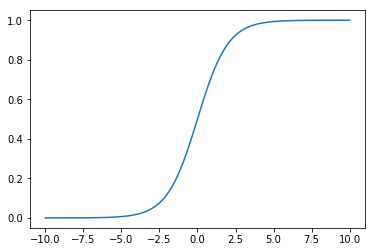

In [30]:
plt.plot(sample_z,sample_a)

In [32]:
class Sigmoid(Operation):
    
    def __init__(self,z):
        
        super().__init__([z])
        
    def compute(self,z_val):
        return 1/ (1 + np.exp(-z_val))

In [33]:
from sklearn.datasets import make_blobs

In [34]:
data = make_blobs(n_samples=50,n_features=2,centers=2,random_state=75)

In [36]:
type(data)

tuple

In [38]:
features = data[0]

In [39]:
labels = data[1]

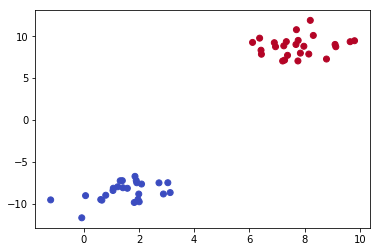

In [43]:
plt.scatter(features[:,0],features[:,1],c=labels,cmap='coolwarm')

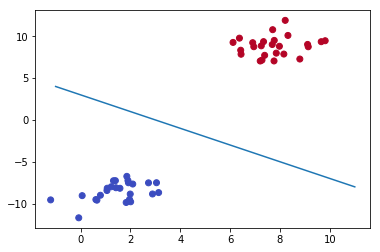

In [48]:
x = np.linspace(-1,11,11)
y = -x + 3
plt.scatter(features[:,0],features[:,1],c=labels,cmap='coolwarm')
plt.plot(x,y)

(1,1) * f - 3 = 0

In [49]:
np.array([1,1]).dot(np.array([[8],[10]])) - 3

array([15])

In [50]:
np.array([1,1]).dot(np.array([[2],[-10]])) - 3

array([-11])

In [72]:
g = Graph()

In [73]:
g.set_as_default()

In [74]:
x = Placeholder()

In [75]:
w = Variable([1,1])

In [76]:
b = Variable(-5)

In [77]:
z = add(matmul(w,x),b)

In [78]:
a = Sigmoid(z)

In [79]:
sess = Session()

In [84]:
sess.run(operation=a,feed_dict={x:[0,-11]})

<class '__main__.Variable'>
<class '__main__.Placeholder'>
<class '__main__.matmul'>
<class '__main__.Variable'>
<class '__main__.add'>
<class '__main__.Sigmoid'>


array(1.12535162e-07)